In [ ]:
from astropy.table import Table
import torch

import matplotlib.pyplot as plt
from bliss.reporting import get_snr

import numpy as np

from bliss.datasets.lsst import prepare_final_galaxy_catalog, prepare_final_star_catalog
from bliss.datasets.table_utils import column_to_tensor

from pathlib import Path

from bliss.datasets.galsim_blends import generate_dataset

In [ ]:
HOME_DIR = Path("../../../")
_cat = Table.read(HOME_DIR / "data" / "OneDegSq.fits")
_star_mags = column_to_tensor(Table.read(HOME_DIR / "data" / "stars_med_june2018.fits"), "i_ab")
CATSIM_CAT = prepare_final_galaxy_catalog(_cat)
STAR_MAGS = prepare_final_star_catalog(_star_mags)
len(CATSIM_CAT), len(STAR_MAGS)

(575903, 17077)

In [ ]:
from bliss.datasets.lsst import get_default_lsst_psf


psf = get_default_lsst_psf()

In [ ]:
from bliss.datasets.lsst import GALAXY_DENSITY, DEFAULT_SLEN, STAR_DENSITY, MAX_N_SOURCES


ds = generate_dataset(
                100,
                CATSIM_CAT,
                STAR_MAGS,
                psf=psf,
                max_n_sources=MAX_N_SOURCES,
                galaxy_density=GALAXY_DENSITY,
                star_density=STAR_DENSITY,
                slen=DEFAULT_SLEN,
                bp=24,
                max_shift=0.5,
            )


100%|██████████| 100/100 [00:12<00:00,  8.20it/s]


In [ ]:
images = ds['images']
images.shape

torch.Size([100, 1, 148, 148])

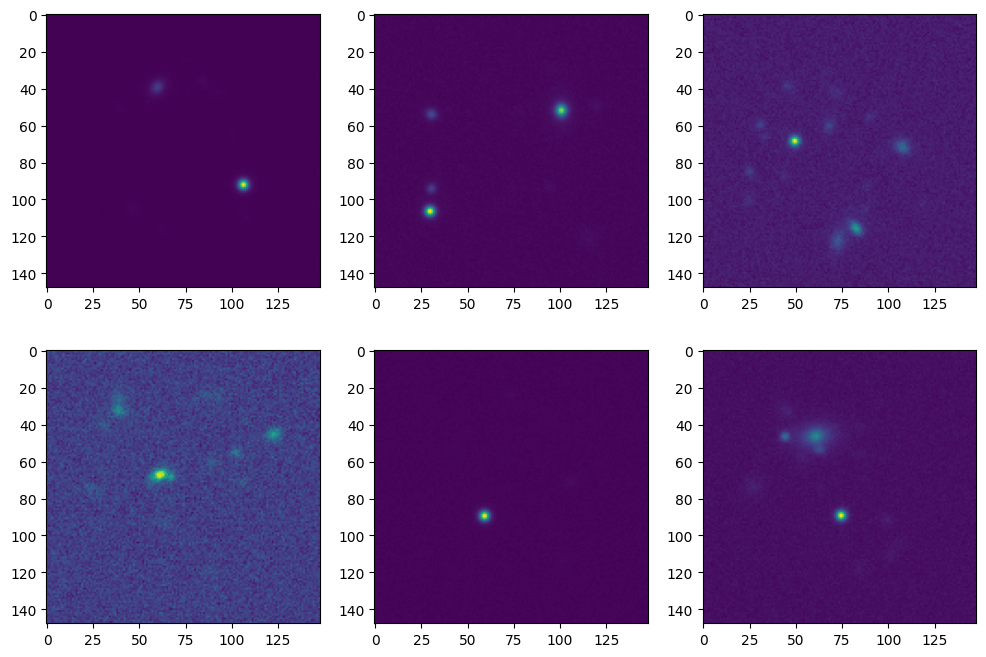

In [ ]:
# plot 6 example images of blends
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
for ax in axs.flatten():
    idx = np.random.choice(np.arange(100))
    ax.imshow(images[idx, 0])

In [ ]:
# quick check on expected number of galaxies and obtained number of galaxies
ds['n_sources'].float().mean(), GALAXY_DENSITY * 100 * 100  * 0.2 * 0.2 / 3600

(tensor(18.8000), 17.77777777777778)